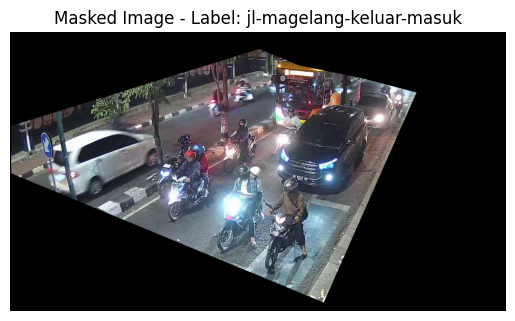

In [4]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# Load LabelMe JSON data
with open('dataset/segmentation/cctv1.json', 'r') as json_file:
    labelme_data = json.load(json_file)

# Load the original image
original_image = cv2.imread('dataset/segmentation/cctv1.jpg')

# Extract the label
label = labelme_data['shapes'][0]['label']

# Extract polygon coordinates
polygon_coords = labelme_data['shapes'][0]['points']

# Create an empty mask
mask = np.zeros_like(original_image, dtype=np.uint8)

# Convert polygon coordinates to NumPy array
polygon_np = np.array(polygon_coords, np.int32)

# Reshape the polygon coordinates for use in fillPoly
polygon_np = polygon_np.reshape((-1, 1, 2))

# Draw filled polygon on the mask
cv2.fillPoly(mask, [polygon_np], (255, 255, 255))

# Create a masked image
masked_image = cv2.bitwise_and(original_image, mask)

# Display the masked image using Matplotlib
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.title(f'Masked Image - Label: {label}')
plt.show()


# # Save the masked image
# cv2.imwrite('masked_image.jpg', masked_image)


In [44]:
from ultralytics import YOLO
model = YOLO('yolov8s-finetuned.pt')

In [62]:
desired_height = 640
desired_width = 640
reshaped_image = cv2.resize(masked_image, (desired_width, desired_height))

result = model([reshaped_image, reshaped_image], iou=0.5, device='mps', batch=2)


0: 640x640 1 bus, 1 car, 5 motorbikes, 1: 640x640 1 bus, 1 car, 5 motorbikes, 3150.6ms
Speed: 731.1ms preprocess, 1575.3ms inference, 32.1ms postprocess per image at shape (1, 3, 640, 640)


In [60]:
result[0].boxes.cls.cpu().numpy()

array([          1,           2,           2,           0,           2,           2,           2], dtype=float32)

In [61]:
result[1].boxes.cls.cpu().numpy()

array([          1,           2,           2,           0,           2,           2,           2], dtype=float32)

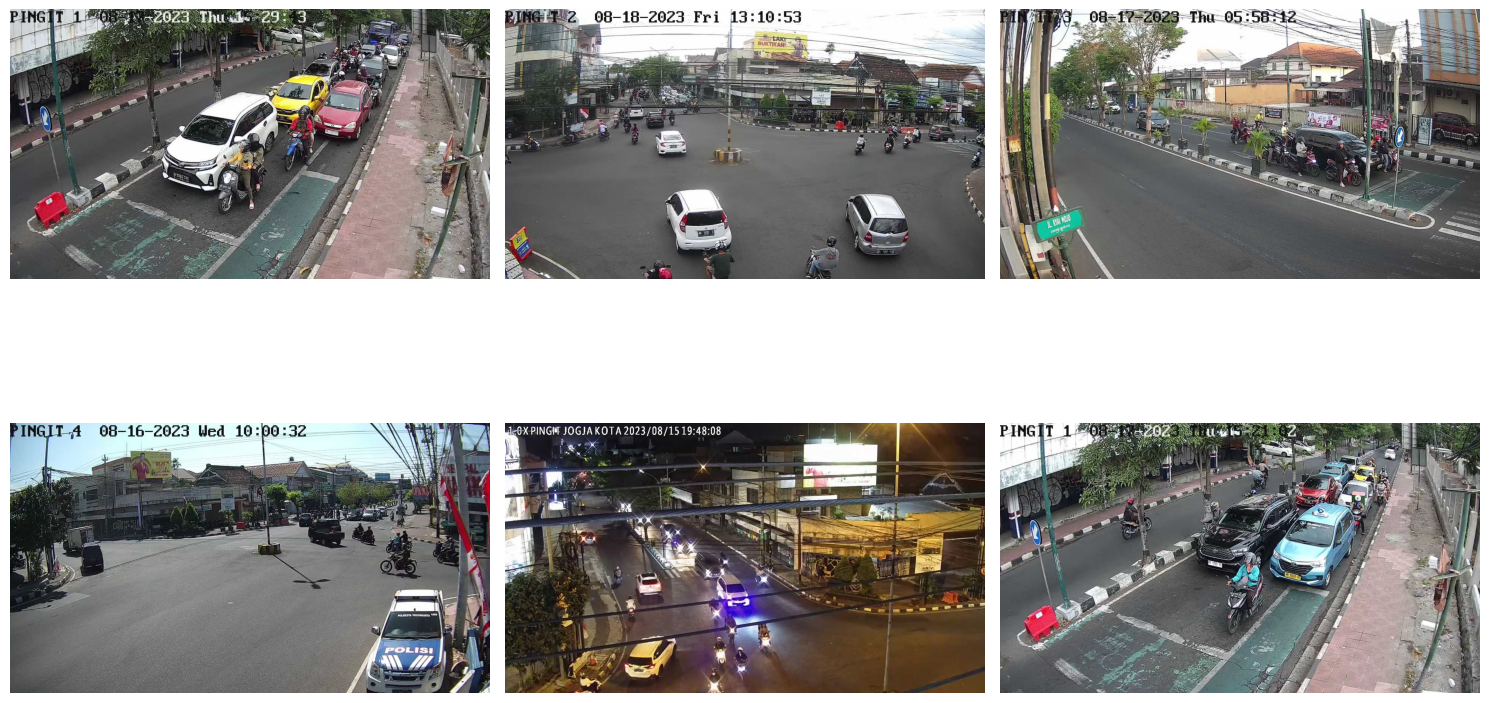

In [7]:
# Generate example images (replace with your actual images)
image1 = cv2.cvtColor(cv2.imread(f'sample-img/cctv1.jpg'), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread(f'sample-img/cctv2.jpg'), cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(cv2.imread(f'sample-img/cctv3.jpg'), cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(cv2.imread(f'sample-img/cctv4.jpg'), cv2.COLOR_BGR2RGB)
image5 = cv2.cvtColor(cv2.imread(f'sample-img/cctv5.jpg'), cv2.COLOR_BGR2RGB)
image6 = cv2.cvtColor(cv2.imread(f'sample-img/cctv6.jpg'), cv2.COLOR_BGR2RGB)

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the images without axes
axs[0, 0].imshow(image1, cmap='gray')
axs[0, 0].axis('off')  # Turn off axes

axs[0, 1].imshow(image2, cmap='gray')
axs[0, 1].axis('off')  # Turn off axes

axs[0, 2].imshow(image3, cmap='gray')
axs[0, 2].axis('off')  # Turn off axes

axs[1, 0].imshow(image4, cmap='gray')
axs[1, 0].axis('off')  # Turn off axes

axs[1, 1].imshow(image5, cmap='gray')
axs[1, 1].axis('off')  # Turn off axes

axs[1, 2].imshow(image6, cmap='gray')
axs[1, 2].axis('off')  # Turn off axes

# Add a title to the entire set of subplots
# fig.suptitle('Images without Axes', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

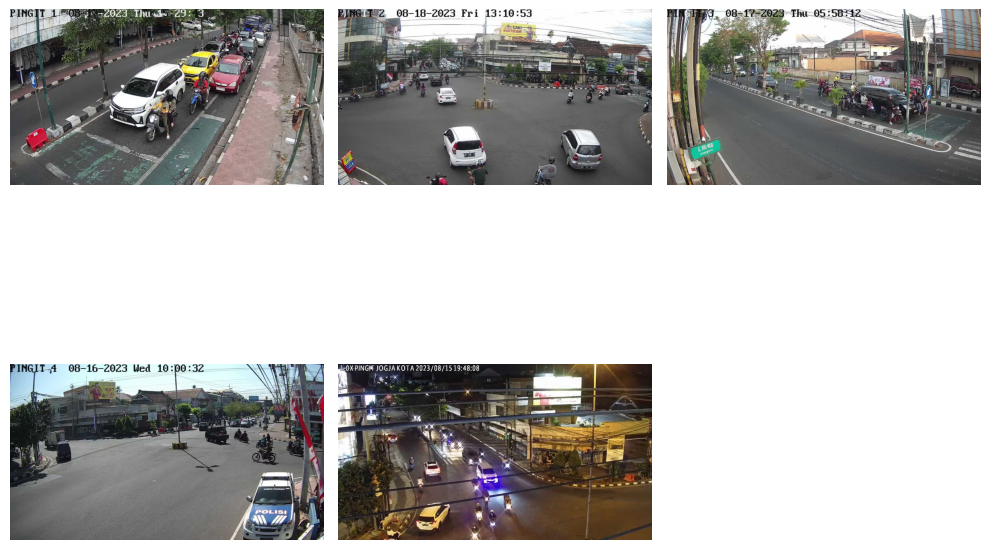

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

# Create a figure with a 2x3 grid of subplots
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 2, 2], height_ratios=[1, 1])

# Add images to the subplots
image_paths = ["image_2023-08-17 08/31/19.650459.jpg", "image_2023-08-17 08/31/19.650459.jpg", "image_2023-08-17 08/31/19.650459.jpg", "image_2023-08-17 08/31/19.650459.jpg", "image_2023-08-17 08/31/19.650459.jpg"]  # Replace with your image paths

for i in range(3):
    ax = plt.subplot(gs[0, i])
    image = cv2.cvtColor(cv2.imread(f'sample-img/cctv{i+1}.jpg'), cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    # ax.set_title(f"CCTV {i+1}")
    ax.axis('off') 

for i in range(2):
    ax = plt.subplot(gs[1, i])
    # ax.imshow(plt.imread(f'sample-img/cctv{i+4}.jpg]}'))
    image = cv2.cvtColor(cv2.imread(f'sample-img/cctv{i+4}.jpg'), cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    ax.axis('off') 
    # ax.set_title(f"CCTV {i+4}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
